## <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea">Assignment 3: Bancassurance</span>

&nbsp;

<p align="center" style="font-family: Arial;color:#0e92ea;font-size:1em;">
Build a model to identify the positively responding customers who have a higher probability of purchasing the insurance
    
</p>

##  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Contents:</span>

<ol style="font-family: Arial;color:#0e92ea;font-size:1em;">
    <li>Data Overview and EDA</li>
    <li>Outlier Treatment and Feature Engineering</li>
    <li>Building Decision Tree Model and Analysis</li>
    <li>Building Logistic Regression Model and Analysis</li>
    <li>Conclusions</li>
</ol>

In [1]:
import os
import warnings
import pprint
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

from matplotlib import gridspec
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from os import system
from IPython.display import Image


warnings.filterwarnings('ignore')

main_data = pd.read_csv('My Bank.csv')

default_color_palette  = ["#03A9F4","#7C4DFF", "#FF5252", "#D50000", "#FF6F00", "#0288D1", "#7C4DFF"] 
stats_colors           = {'Mean':'#D50000', 'Mode':'#FF3D00', 'Median':'#2962FF'} # Set standard colors for mean, mode and median to use accross entire notebook.
gender_color_palette   = {"Female":"#E91E63", "Male":"#42A5F5"} # Gender based colors.

####  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> 1. Data Overview and EDA:
    
<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ea"> General Observations:
<ul>
    <li>The data has no mising values.</li>
</ul>

In [2]:
main_data.head(10)

,CUST_ID,TARGET,AGE,GENDER,BALANCE,OCCUPATION,SCR,HOLDING_PERIOD,ACC_TYPE,ACC_OP_DATE,...,NO_OF_CHQ_DR_TXNS,FLG_HAS_CC,AMT_ATM_DR,AMT_BR_CSH_WDL_DR,AMT_CHQ_DR,AMT_NET_DR,AMT_MOB_DR,FLG_HAS_ANY_CHGS,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN
0,C7927,0,27,M,3383.75,SELF-EMP,776,30,SA,3/23/2005,...,0,0,13100,0,0,973557.0,0,0,1,1
1,C6877,0,47,M,287489.04,SAL,324,28,SA,10-11-2008,...,0,0,6600,0,0,799813.0,0,1,1,0
2,C19922,0,40,M,18216.88,SELF-EMP,603,2,SA,4/26/2012,...,2,0,11200,561120,49320,997570.0,0,1,1,1
3,C8183,0,53,M,71720.48,SAL,196,13,CA,07-04-2008,...,4,0,26100,673590,60780,741506.0,71388,0,1,0
4,C12123,0,36,M,1671622.89,PROF,167,24,SA,12/29/2001,...,0,0,0,808480,0,0.0,0,0,1,0
5,C257,0,42,F,521685.69,PROF,493,26,SA,06-07-2001,...,0,1,18500,379310,0,0.0,0,0,1,1
6,C8300,0,30,M,204458.60,PROF,479,14,SA,8/25/2002,...,4,0,6200,0,10580,770065.0,0,1,0,1
7,C5999,0,53,F,58516.34,SAL,562,25,CA,3/15/2009,...,0,0,0,945160,0,0.0,0,0,1,1
8,C5692,0,42,F,13158.14,SELF-EMP,105,15,SA,02-08-2010,...,1,1,35400,198430,51490,326421.0,170332,0,1,1
9,C3241,0,30,M,831150.18,PROF,170,13,SA,03-02-2008,...,4,0,18000,869880,32610,0.0,0,0,0,0


In [3]:
# Drop The Id Column
main_data.drop("CUST_ID", axis=1, inplace=True)
main_data.head(10)

,TARGET,AGE,GENDER,BALANCE,OCCUPATION,SCR,HOLDING_PERIOD,ACC_TYPE,ACC_OP_DATE,LEN_OF_RLTN_IN_MNTH,...,NO_OF_CHQ_DR_TXNS,FLG_HAS_CC,AMT_ATM_DR,AMT_BR_CSH_WDL_DR,AMT_CHQ_DR,AMT_NET_DR,AMT_MOB_DR,FLG_HAS_ANY_CHGS,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN
0,0,27,M,3383.75,SELF-EMP,776,30,SA,3/23/2005,146,...,0,0,13100,0,0,973557.0,0,0,1,1
1,0,47,M,287489.04,SAL,324,28,SA,10-11-2008,104,...,0,0,6600,0,0,799813.0,0,1,1,0
2,0,40,M,18216.88,SELF-EMP,603,2,SA,4/26/2012,61,...,2,0,11200,561120,49320,997570.0,0,1,1,1
3,0,53,M,71720.48,SAL,196,13,CA,07-04-2008,107,...,4,0,26100,673590,60780,741506.0,71388,0,1,0
4,0,36,M,1671622.89,PROF,167,24,SA,12/29/2001,185,...,0,0,0,808480,0,0.0,0,0,1,0
5,0,42,F,521685.69,PROF,493,26,SA,06-07-2001,192,...,0,1,18500,379310,0,0.0,0,0,1,1
6,0,30,M,204458.60,PROF,479,14,SA,8/25/2002,177,...,4,0,6200,0,10580,770065.0,0,1,0,1
7,0,53,F,58516.34,SAL,562,25,CA,3/15/2009,99,...,0,0,0,945160,0,0.0,0,0,1,1
8,0,42,F,13158.14,SELF-EMP,105,15,SA,02-08-2010,88,...,1,1,35400,198430,51490,326421.0,170332,0,1,1
9,0,30,M,831150.18,PROF,170,13,SA,03-02-2008,111,...,4,0,18000,869880,32610,0.0,0,0,0,0


In [4]:
print(f"Rows : {main_data.shape[0]} x Columns : {main_data.shape[1]}")

Rows : 20000 x Columns : 25


In [5]:
'''
Input:
Pandas DataFrame

Output:
Displays DataFrame structure 
(columns, nulls and non nulls counts and percentage highlighing columns with most number of nulls)

Retunrs:
N/A
'''
def info(dataFrame):
    nulls_series             = dataFrame.isna().sum()         # Get a series counting number of empty values for each column
    nonnulls_series          = dataFrame.notnull().sum()      # Get a series counting number of non empty valuesfor each column 
    nulls_percentage         = ((nulls_series * 100)/(nulls_series + nonnulls_series)).astype(float)
    column_datatypes         = dataFrame.dtypes               # Get a series containing data types for each column 

    nulls_count_df = pd.concat(
        [nulls_series, nonnulls_series, nulls_percentage, column_datatypes],
        axis=1,
        keys=["Nulls", "Non-Nulls","Nulls %", "Type"], 
        sort=True)
    cm = sns.light_palette("red", as_cmap=True)
    display(nulls_count_df.style.background_gradient(cmap=cm, subset=pd.IndexSlice[:, ['Nulls %']]).format(formatter={('Nulls %'): "{:.2f}%"}))    

In [6]:
info(main_data)

,Nulls,Non-Nulls,Nulls %,Type
ACC_OP_DATE,0,20000,0.00%,object
ACC_TYPE,0,20000,0.00%,object
AGE,0,20000,0.00%,int64
AMT_ATM_DR,0,20000,0.00%,int64
AMT_BR_CSH_WDL_DR,0,20000,0.00%,int64
AMT_CHQ_DR,0,20000,0.00%,int64
AMT_MOB_DR,0,20000,0.00%,int64
AMT_NET_DR,0,20000,0.00%,float64
BALANCE,0,20000,0.00%,float64
FLG_HAS_ANY_CHGS,0,20000,0.00%,int64


In [7]:
main_data[main_data.select_dtypes(include=['object']).columns.tolist()].head(10)

,GENDER,OCCUPATION,ACC_TYPE,ACC_OP_DATE
0,M,SELF-EMP,SA,3/23/2005
1,M,SAL,SA,10-11-2008
2,M,SELF-EMP,SA,4/26/2012
3,M,SAL,CA,07-04-2008
4,M,PROF,SA,12/29/2001
5,F,PROF,SA,06-07-2001
6,M,PROF,SA,8/25/2002
7,F,SAL,CA,3/15/2009
8,F,SELF-EMP,SA,02-08-2010
9,M,PROF,SA,03-02-2008


<p>Looking at all the columns with type='object', all of them are cateorial while the ACC_OP_DATE is a DateTime type</p>

In [8]:
def ConvertColTo(fromType, toType):
    for col_name in main_data.columns:
        if main_data[col_name].dtype == fromType:
            if col_name != 'ACC_OP_DATE':
                main_data[col_name] = main_data[col_name].astype(toType)
            else:
                main_data[col_name] = pd.to_datetime(main_data[col_name])
        
    main_data.info()

ConvertColTo("object", "category")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   TARGET                    20000 non-null  int64         
 1   AGE                       20000 non-null  int64         
 2   GENDER                    20000 non-null  category      
 3   BALANCE                   20000 non-null  float64       
 4   OCCUPATION                20000 non-null  category      
 5   SCR                       20000 non-null  int64         
 6   HOLDING_PERIOD            20000 non-null  int64         
 7   ACC_TYPE                  20000 non-null  category      
 8   ACC_OP_DATE               20000 non-null  datetime64[ns]
 9   LEN_OF_RLTN_IN_MNTH       20000 non-null  int64         
 10  NO_OF_L_CR_TXNS           20000 non-null  int64         
 11  NO_OF_BR_CSH_WDL_DR_TXNS  20000 non-null  int64         
 12  NO_OF_ATM_DR_TXNS 

In [9]:
'''
Input:
N/A

Output:
Go through each categorial column and print unique values for that column.

Retunrs:
N/A
'''
def CountUniqueValues():
    col_names = main_data.select_dtypes(include=['category']).columns.tolist()
    print(col_names)
    for col_name in col_names:
        print(f"\n======Unique Values count for: '{col_name}'========\n")
        for unique_col_value in  main_data[col_name].unique().tolist():
            total_count = main_data[col_name].count()
            unique_values_count = main_data[main_data[col_name] == unique_col_value][col_name].count()
            percentage = str(round((unique_values_count/total_count) * 100, 2))
            print(f"{unique_col_value} \t: {unique_values_count} ({percentage}%)")
        print(f"\n====================================================\n")


CountUniqueValues()

['GENDER', 'OCCUPATION', 'ACC_TYPE']

======Unique Values count for: 'GENDER'========

M 	: 14376 (71.88%)
F 	: 5433 (27.16%)
O 	: 191 (0.96%)



======Unique Values count for: 'OCCUPATION'========

SELF-EMP 	: 3568 (17.84%)
SAL 	: 5855 (29.28%)
PROF 	: 5417 (27.08%)
SENP 	: 5160 (25.8%)



======Unique Values count for: 'ACC_TYPE'========

SA 	: 15759 (78.8%)
CA 	: 4241 (21.2%)




<p>The categorial column items do not need not need to be in a particuler order, so we will do onehot encoding for these and no specific ordering.</p>

In [10]:
oneHotCols = main_data.select_dtypes(include=['category']).columns.tolist()
print(oneHotCols)

main_data = pd.get_dummies(main_data, columns=oneHotCols)
main_data.head(10)

['GENDER', 'OCCUPATION', 'ACC_TYPE']


,TARGET,AGE,BALANCE,SCR,HOLDING_PERIOD,ACC_OP_DATE,LEN_OF_RLTN_IN_MNTH,NO_OF_L_CR_TXNS,NO_OF_BR_CSH_WDL_DR_TXNS,NO_OF_ATM_DR_TXNS,...,FLG_HAS_OLD_LOAN,GENDER_F,GENDER_M,GENDER_O,OCCUPATION_PROF,OCCUPATION_SAL,OCCUPATION_SELF-EMP,OCCUPATION_SENP,ACC_TYPE_CA,ACC_TYPE_SA
0,0,27,3383.75,776,30,2005-03-23,146,7,0,1,...,1,0,1,0,0,0,1,0,0,1
1,0,47,287489.04,324,28,2008-10-11,104,8,0,1,...,0,0,1,0,0,1,0,0,0,1
2,0,40,18216.88,603,2,2012-04-26,61,10,1,1,...,1,0,1,0,0,0,1,0,0,1
3,0,53,71720.48,196,13,2008-07-04,107,36,4,2,...,0,0,1,0,0,1,0,0,1,0
4,0,36,1671622.89,167,24,2001-12-29,185,20,1,0,...,0,0,1,0,1,0,0,0,0,1
5,0,42,521685.69,493,26,2001-06-07,192,5,1,1,...,1,1,0,0,1,0,0,0,0,1
6,0,30,204458.60,479,14,2002-08-25,177,6,0,1,...,1,0,1,0,1,0,0,0,0,1
7,0,53,58516.34,562,25,2009-03-15,99,14,3,0,...,1,1,0,0,0,1,0,0,1,0
8,0,42,13158.14,105,15,2010-02-08,88,18,6,2,...,1,1,0,0,0,0,1,0,0,1
9,0,30,831150.18,170,13,2008-03-02,111,14,3,1,...,0,0,1,0,1,0,0,0,0,1


In [11]:
main_data.corr()["TARGET"].sort_values(ascending=False)

TARGET                      1.000000
NO_OF_L_CR_TXNS             0.120284
OCCUPATION_SELF-EMP         0.109107
NO_OF_CHQ_DR_TXNS           0.103531
NO_OF_BR_CSH_WDL_DR_TXNS    0.101909
FLG_HAS_CC                  0.100513
NO_OF_NET_DR_TXNS           0.097071
AMT_ATM_DR                  0.083251
AMT_MOB_DR                  0.083215
NO_OF_ATM_DR_TXNS           0.082359
SCR                         0.078909
ACC_TYPE_CA                 0.068407
AMT_NET_DR                  0.062121
AMT_CHQ_DR                  0.060796
NO_OF_MOB_DR_TXNS           0.054477
AMT_BR_CSH_WDL_DR           0.048360
FLG_HAS_ANY_CHGS            0.045783
GENDER_M                    0.041739
GENDER_O                    0.027940
AGE                         0.022977
FLG_HAS_NOMINEE             0.011784
OCCUPATION_PROF            -0.008615
FLG_HAS_OLD_LOAN           -0.011555
LEN_OF_RLTN_IN_MNTH        -0.023618
OCCUPATION_SENP            -0.036585
OCCUPATION_SAL             -0.048207
GENDER_F                   -0.048296
B

<p>We will create more integer features from the ACC_OP_DATE datetime column </p>

In [12]:
main_data['ACC_OP_DATE_YEAR'] = main_data['ACC_OP_DATE'].dt.year
main_data['ACC_OP_DATE_MONTH'] = main_data['ACC_OP_DATE'].dt.month
main_data['ACC_OP_DATE_DAY'] = main_data['ACC_OP_DATE'].dt.day
main_data.drop("ACC_OP_DATE", axis=1, inplace=True)
main_data.head(10)

,TARGET,AGE,BALANCE,SCR,HOLDING_PERIOD,LEN_OF_RLTN_IN_MNTH,NO_OF_L_CR_TXNS,NO_OF_BR_CSH_WDL_DR_TXNS,NO_OF_ATM_DR_TXNS,NO_OF_NET_DR_TXNS,...,GENDER_O,OCCUPATION_PROF,OCCUPATION_SAL,OCCUPATION_SELF-EMP,OCCUPATION_SENP,ACC_TYPE_CA,ACC_TYPE_SA,ACC_OP_DATE_YEAR,ACC_OP_DATE_MONTH,ACC_OP_DATE_DAY
0,0,27,3383.75,776,30,146,7,0,1,2,...,0,0,0,1,0,0,1,2005,3,23
1,0,47,287489.04,324,28,104,8,0,1,1,...,0,0,1,0,0,0,1,2008,10,11
2,0,40,18216.88,603,2,61,10,1,1,1,...,0,0,0,1,0,0,1,2012,4,26
3,0,53,71720.48,196,13,107,36,4,2,3,...,0,0,1,0,0,1,0,2008,7,4
4,0,36,1671622.89,167,24,185,20,1,0,0,...,0,1,0,0,0,0,1,2001,12,29
5,0,42,521685.69,493,26,192,5,1,1,0,...,0,1,0,0,0,0,1,2001,6,7
6,0,30,204458.60,479,14,177,6,0,1,1,...,0,1,0,0,0,0,1,2002,8,25
7,0,53,58516.34,562,25,99,14,3,0,0,...,0,0,1,0,0,1,0,2009,3,15
8,0,42,13158.14,105,15,88,18,6,2,4,...,0,0,0,1,0,0,1,2010,2,8
9,0,30,831150.18,170,13,111,14,3,1,0,...,0,1,0,0,0,0,1,2008,3,2


In [13]:
main_data.corr()["TARGET"].sort_values(ascending=False)

TARGET                      1.000000
NO_OF_L_CR_TXNS             0.120284
OCCUPATION_SELF-EMP         0.109107
NO_OF_CHQ_DR_TXNS           0.103531
NO_OF_BR_CSH_WDL_DR_TXNS    0.101909
FLG_HAS_CC                  0.100513
NO_OF_NET_DR_TXNS           0.097071
AMT_ATM_DR                  0.083251
AMT_MOB_DR                  0.083215
NO_OF_ATM_DR_TXNS           0.082359
SCR                         0.078909
ACC_TYPE_CA                 0.068407
AMT_NET_DR                  0.062121
AMT_CHQ_DR                  0.060796
NO_OF_MOB_DR_TXNS           0.054477
AMT_BR_CSH_WDL_DR           0.048360
FLG_HAS_ANY_CHGS            0.045783
GENDER_M                    0.041739
GENDER_O                    0.027940
ACC_OP_DATE_YEAR            0.023967
AGE                         0.022977
FLG_HAS_NOMINEE             0.011784
ACC_OP_DATE_MONTH          -0.003723
ACC_OP_DATE_DAY            -0.007104
OCCUPATION_PROF            -0.008615
FLG_HAS_OLD_LOAN           -0.011555
LEN_OF_RLTN_IN_MNTH        -0.023618
O

In [14]:
'''
Input:
Axis, column name/x-axis, hue name

Output:
Displays a count plot.

Retunrs:
N/A
''' 
def HistBoxplot(box_chart_ax, hist_chart_ax, x_axis):
    sns.boxplot(
        data=main_data,
        x=main_data[x_axis],
        showmeans=True,
        ax=box_chart_ax)
    
    sns.histplot(
        data=main_data,
        x=main_data[x_axis],
        kde=True,
        ax=hist_chart_ax)
    
    hist_chart_ax.axvline(main_data[x_axis].mean(),                 # Get the mean of the values in the given column and draw a vertical line that cuts the chart on the mean value 
               color=stats_colors['Mean'],                                  # Use on of the colors predefined on this notebook
               label='Mean',                                                # Set the label to be diplayed on the legend
               linestyle="dashed");                                         # Make the line have dashes
    
    hist_chart_ax.axvline(main_data[x_axis].median(),               # Plot the median line on the chart.
               color=stats_colors['Median'],                                # Use on of the colors predefined on this notebook
               label='Median',                                              # Set the label to be diplayed on the legend
               linestyle="dashed");                                         # Make the line have dashes
    
    hist_chart_ax.axvline(main_data[x_axis].mode()[0],              # Plot the mode line on the chart.
               color=stats_colors['Mode'],                                  # Use on of the colors predefined on this notebook 
               label='Mode',                                                # Set the label to be diplayed on the legend
               linestyle="dashed");                                         # Make the line have dashes
    
    hist_chart_ax.legend(loc='upper right')

def PlotHistBoxGrid():
    col_names = main_data.select_dtypes(include=['float', 'int64']).columns.tolist()
    print(col_names)

    col_index = 0
    for r in range(0, int(len(col_names)), 3):
        fig, (box, hist) = plt.subplots(
            nrows=2,                                                                # Number of rows of the grid
            ncols=3,                                                                # Number of columns of the grid.
            figsize=(15,4),
            gridspec_kw={"height_ratios" : (0.25,0.5)},
            constrained_layout=True)

        for index in range(0, 3):
            if col_index < int(len(col_names)):
                HistBoxplot(box.flat[index], hist.flat[index], col_names[col_index])
            col_index += 1
            
'''
Input:
Column name

Output:
A series containing interquatile range values

Retunrs:
A series containing interquatile range values
''' 
def Get_IQR(col_name):
    quartiles = np.quantile(main_data[col_name][main_data[col_name].notnull()], [.2, .75])
    power_4iqr = 4 * (quartiles[1] - quartiles[0])
    print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}')
    outlier_powers = main_data.loc[np.abs(main_data[col_name] - main_data[col_name].median()) > power_4iqr, col_name]
    print(outlier_powers.array) 
    
    return quartiles

['TARGET', 'AGE', 'BALANCE', 'SCR', 'HOLDING_PERIOD', 'LEN_OF_RLTN_IN_MNTH', 'NO_OF_L_CR_TXNS', 'NO_OF_BR_CSH_WDL_DR_TXNS', 'NO_OF_ATM_DR_TXNS', 'NO_OF_NET_DR_TXNS', 'NO_OF_MOB_DR_TXNS', 'NO_OF_CHQ_DR_TXNS', 'FLG_HAS_CC', 'AMT_ATM_DR', 'AMT_BR_CSH_WDL_DR', 'AMT_CHQ_DR', 'AMT_NET_DR', 'AMT_MOB_DR', 'FLG_HAS_ANY_CHGS', 'FLG_HAS_NOMINEE', 'FLG_HAS_OLD_LOAN', 'ACC_OP_DATE_YEAR', 'ACC_OP_DATE_MONTH', 'ACC_OP_DATE_DAY']


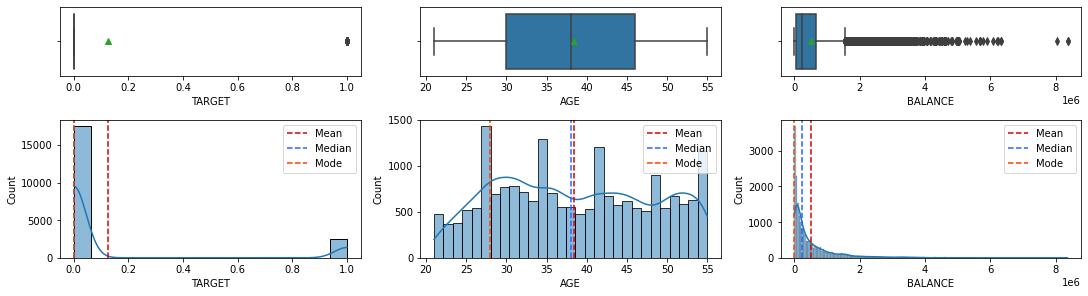

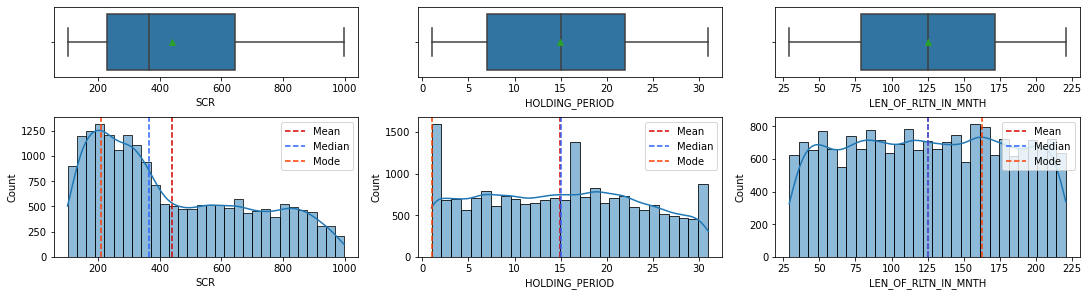

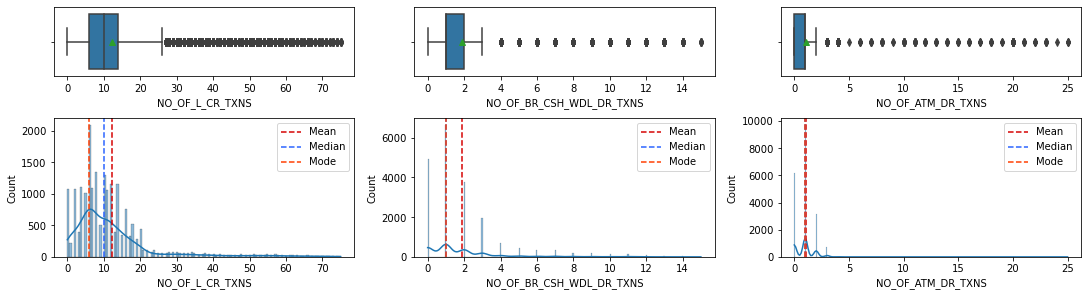

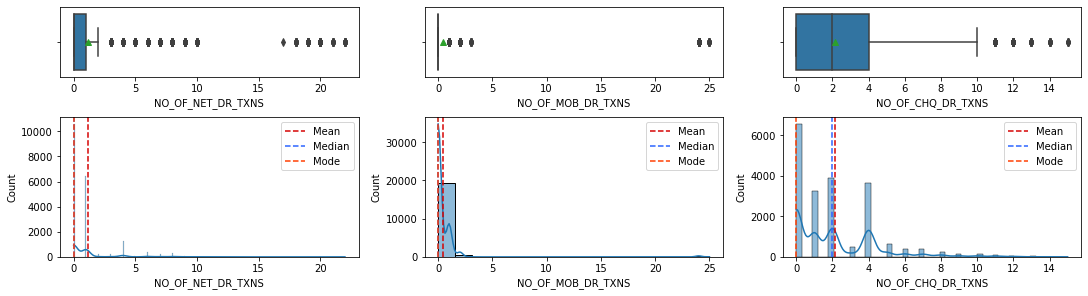

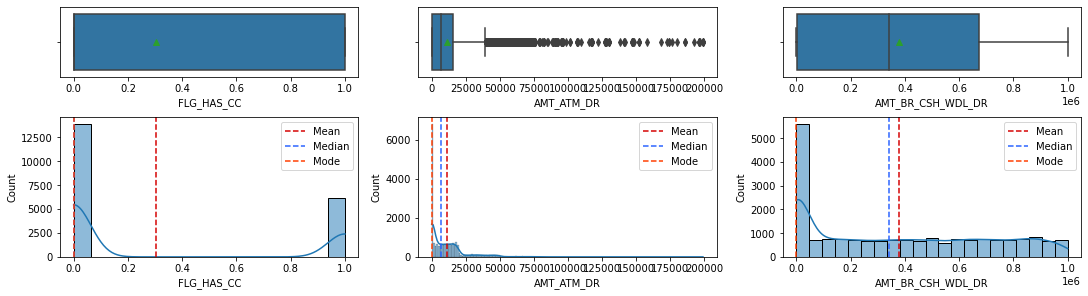

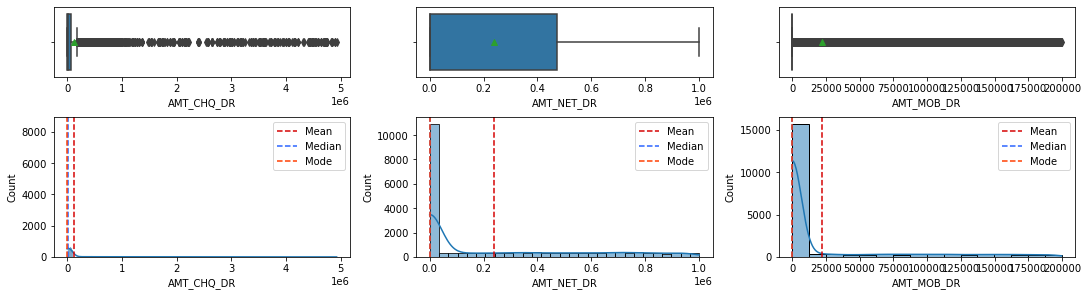

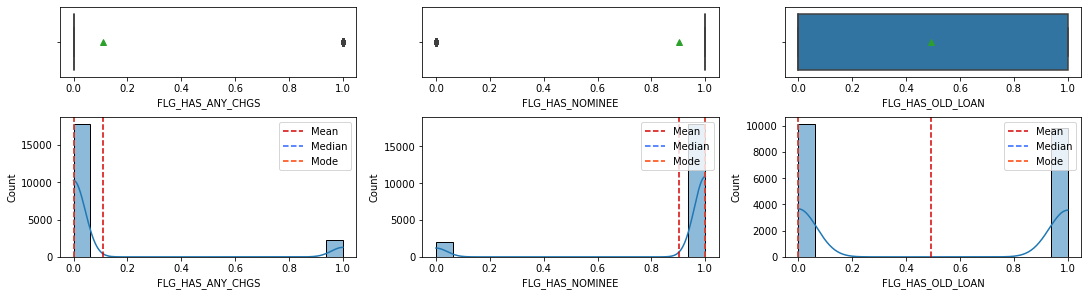

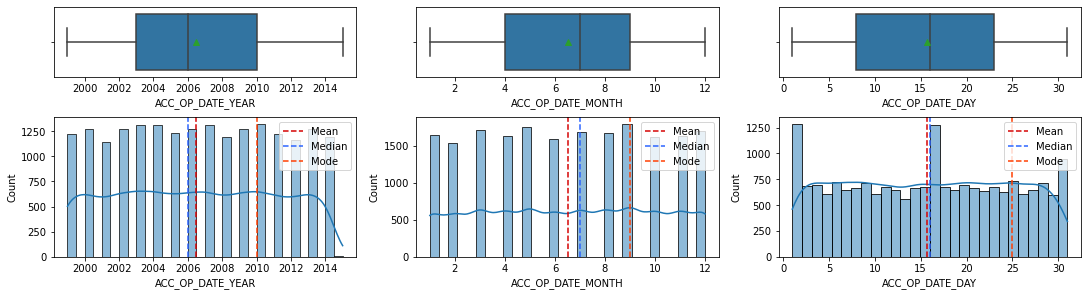

In [15]:
PlotHistBoxGrid()

In [16]:
col_names = ["BALANCE", "NO_OF_L_CR_TXNS", "NO_OF_BR_CSH_WDL_DR_TXNS", "AMT_ATM_DR"]

for col_name in col_names:
    print(f"\n\n==========================={col_name}====================\n")
    main_data[col_name] = np.where(
        main_data[col_name] < Get_IQR(col_name)[0],
        main_data[col_name].median(),
        main_data[col_name])
    print(f"\n\n==========================={col_name}====================\n")



===========================BALANCE====================

Q1 = 47495.61600000001, Q3 = 653876.85, 4*IQR = 2425524.9359999998
<PandasArray>
[5677834.48,  3120315.7, 3298282.18, 3225322.18, 5026707.21, 3263253.19,
 3288447.33, 2678522.21, 2837493.33, 3816559.58,
 ...
 3129741.35, 3241052.51, 2778131.61, 4281573.12, 3332866.93, 3293637.91,
 2755166.11, 2811413.65, 4652635.75, 2778131.61]
Length: 515, dtype: float64


===========================BALANCE====================



===========================NO_OF_L_CR_TXNS====================

Q1 = 5.0, Q3 = 14.0, 4*IQR = 36.0
<PandasArray>
[58, 51, 67, 52, 70, 53, 72, 48, 55, 60,
 ...
 51, 48, 74, 68, 58, 55, 62, 67, 48, 52]
Length: 738, dtype: int64


===========================NO_OF_L_CR_TXNS====================



===========================NO_OF_BR_CSH_WDL_DR_TXNS====================

Q1 = 0.0, Q3 = 2.0, 4*IQR = 8.0
<PandasArray>
[12, 10, 11, 11, 10, 12, 10, 12, 11, 13,
 ...
 12, 10, 10, 13, 10, 11, 11, 11, 12, 10]
Length: 439, dtype: int64

In [20]:
main_data.corr()["TARGET"].sort_values(ascending=False)

TARGET                      1.000000
NO_OF_L_CR_TXNS             0.111090
OCCUPATION_SELF-EMP         0.109107
NO_OF_CHQ_DR_TXNS           0.103531
FLG_HAS_CC                  0.100513
NO_OF_NET_DR_TXNS           0.097071
NO_OF_BR_CSH_WDL_DR_TXNS    0.095514
AMT_MOB_DR                  0.083215
NO_OF_ATM_DR_TXNS           0.082359
SCR                         0.078909
ACC_TYPE_CA                 0.068407
AMT_NET_DR                  0.062121
AMT_CHQ_DR                  0.060796
AMT_ATM_DR                  0.057412
NO_OF_MOB_DR_TXNS           0.054477
AMT_BR_CSH_WDL_DR           0.048360
FLG_HAS_ANY_CHGS            0.045783
GENDER_M                    0.041739
GENDER_O                    0.027940
ACC_OP_DATE_YEAR            0.023967
AGE                         0.022977
FLG_HAS_NOMINEE             0.011784
ACC_OP_DATE_MONTH          -0.003723
ACC_OP_DATE_DAY            -0.007104
OCCUPATION_PROF            -0.008615
FLG_HAS_OLD_LOAN           -0.011555
LEN_OF_RLTN_IN_MNTH        -0.023618
O

In [ ]:
fig, ax = plt.subplots(figsize=(18,18)) 
sns.heatmap(data=main_data.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

In [ ]:
main_data.corr()[['TARGET']]

In [ ]:
# sns.pairplot(main_data, kind="reg")

####  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> 3. Building Decision Tree Model and Analysis:

In [ ]:
X = main_data.drop("TARGET", axis=1)
Y = main_data.pop("TARGET")
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [ ]:
dTree = DecisionTreeClassifier(criterion= 'gini', random_state=1)
dTree.fit(x_train, y_train)

In [ ]:
feature_names = list(X.columns)
print(feature_names)

In [ ]:
# Functions to calculate different metrics

def DisplayConfusionMatrix(model, y_actual, labels=[1,0]):
    y_predict = model.predict(x_test)
    confusion_matrix = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    confusion_matix_df = pd.DataFrame(
        confusion_matrix,
        index   = [i for i in ["Actual No", "Actual Yes"]],
        columns = [i for i in ["Predicted - No", "Predicted - Yes"]])
    
    group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix.flatten()]
    group_percetages = ["{0:.2%}".format(value) for value in confusion_matrix.flatten()/np.sum(confusion_matrix)]
    
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percetages)]
    labels = np.array(labels).reshape(2, 2)
    plt.figure(figsize= (10,7))
    sns.heatmap(confusion_matix_df, annot=labels,fmt='')
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    
def GetMetricsScore(model):
    
    pred_train = model.predict(x_train)
    pred_test  = model.predict(x_test)
    
    train_accuracy = model.score(x_train, y_train)
    test_accuracy  = model.score(x_test, y_test)
    
    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall  = metrics.recall_score(y_test, pred_test)
    
    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision  = metrics.precision_score(y_test, pred_test)
        
    return {
        'Accuracy_Test'   : test_accuracy,
        'Accuracy_Train'  : train_accuracy,
        'Recall_Test'     : test_recall,
        'Recall_Train'    : train_recall,
        'Precision_Test'  : test_precision,
        'Precision_Train' : train_precision
    }
        

def DisplayImportance(model):
    gini_importances = pd.DataFrame(dTree.feature_importances_, columns=["Imp"], index=x_train.columns).sort_values(by = "Imp")
    print(gini_importances)
    
def DisplayImportanceChart(model):
    importances = model.feature_importances_
    indices = np.argsort(importances)

    plt.figure(figsize=(12, 12))
    plt.title('Feature Importance')
    plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
    plt.yticks(range(len(indices)), [list(X.columns)[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()
    
def PlotTree(model, size = [20, 30]):
    plt.figure(figsize=(size[0],size[1]))
    tree.plot_tree(model, feature_names=feature_names, filled=True, fontsize=9, node_ids=True, class_names=True)
    plt.show()
    
def PrintCoeficients(model):
    coefs = pd.DataFrame(
        np.append(model.coef_, model.intercept_),
        index=x_train.columns.tolist() + ["Intercept"],
        columns=["Coefficients"],
    )

    coefs.sort_values('Coefficients')

In [ ]:
DisplayConfusionMatrix(dTree, y_test)

In [ ]:
dTree_model_score = GetMetricsScore(dTree)
pprint.pprint(dTree_model_score)

In [ ]:
DisplayImportanceChart(dTree)

In [ ]:
PlotTree(dTree)

####  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> 4. Building Logistic Regression Model and Analysis:

In [ ]:
# fit model on train
logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(x_train,y_train)

# predict on test
y_predict = logistic_reg_model.predict(x_test)

In [ ]:
PrintCoeficients(logistic_reg_model)

In [ ]:
logistic_reg_model_score = GetMetricsScore(logistic_reg_model)
pprint.pprint(logistic_reg_model_score)

In [ ]:
DisplayConfusionMatrix(logistic_reg_model, y_test)